In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from matplotlib.ticker import FixedLocator
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df.shape

(2200, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64


/tmp/ipykernel_4332/1531155886.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


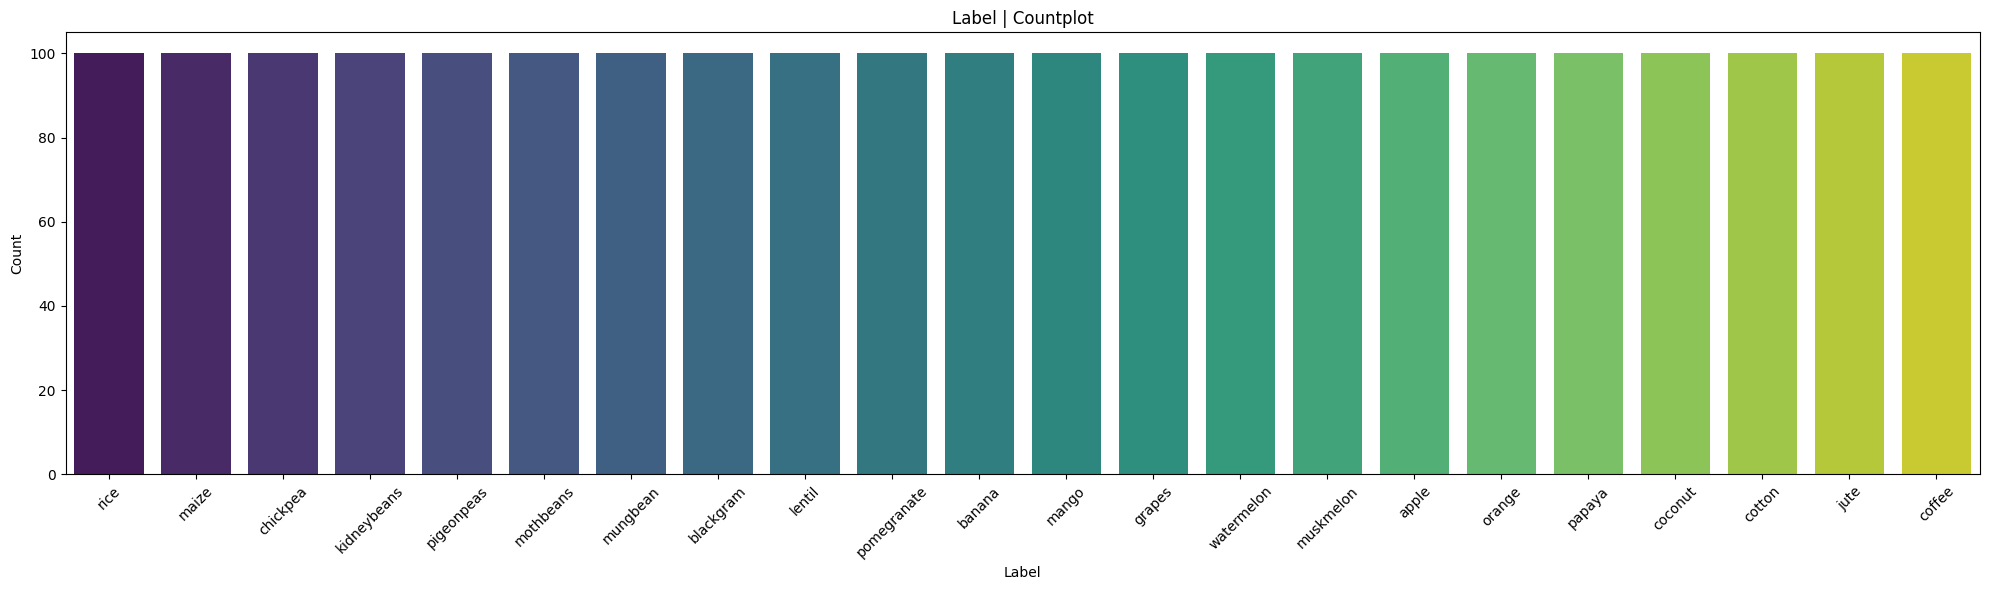

In [7]:
categorical_column = 'label'
label_counts = df[categorical_column].value_counts()
print(label_counts)

plt.figure(figsize=(20, 6))
plt.title(f"{categorical_column.capitalize()} | Countplot")
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel(categorical_column.capitalize())
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


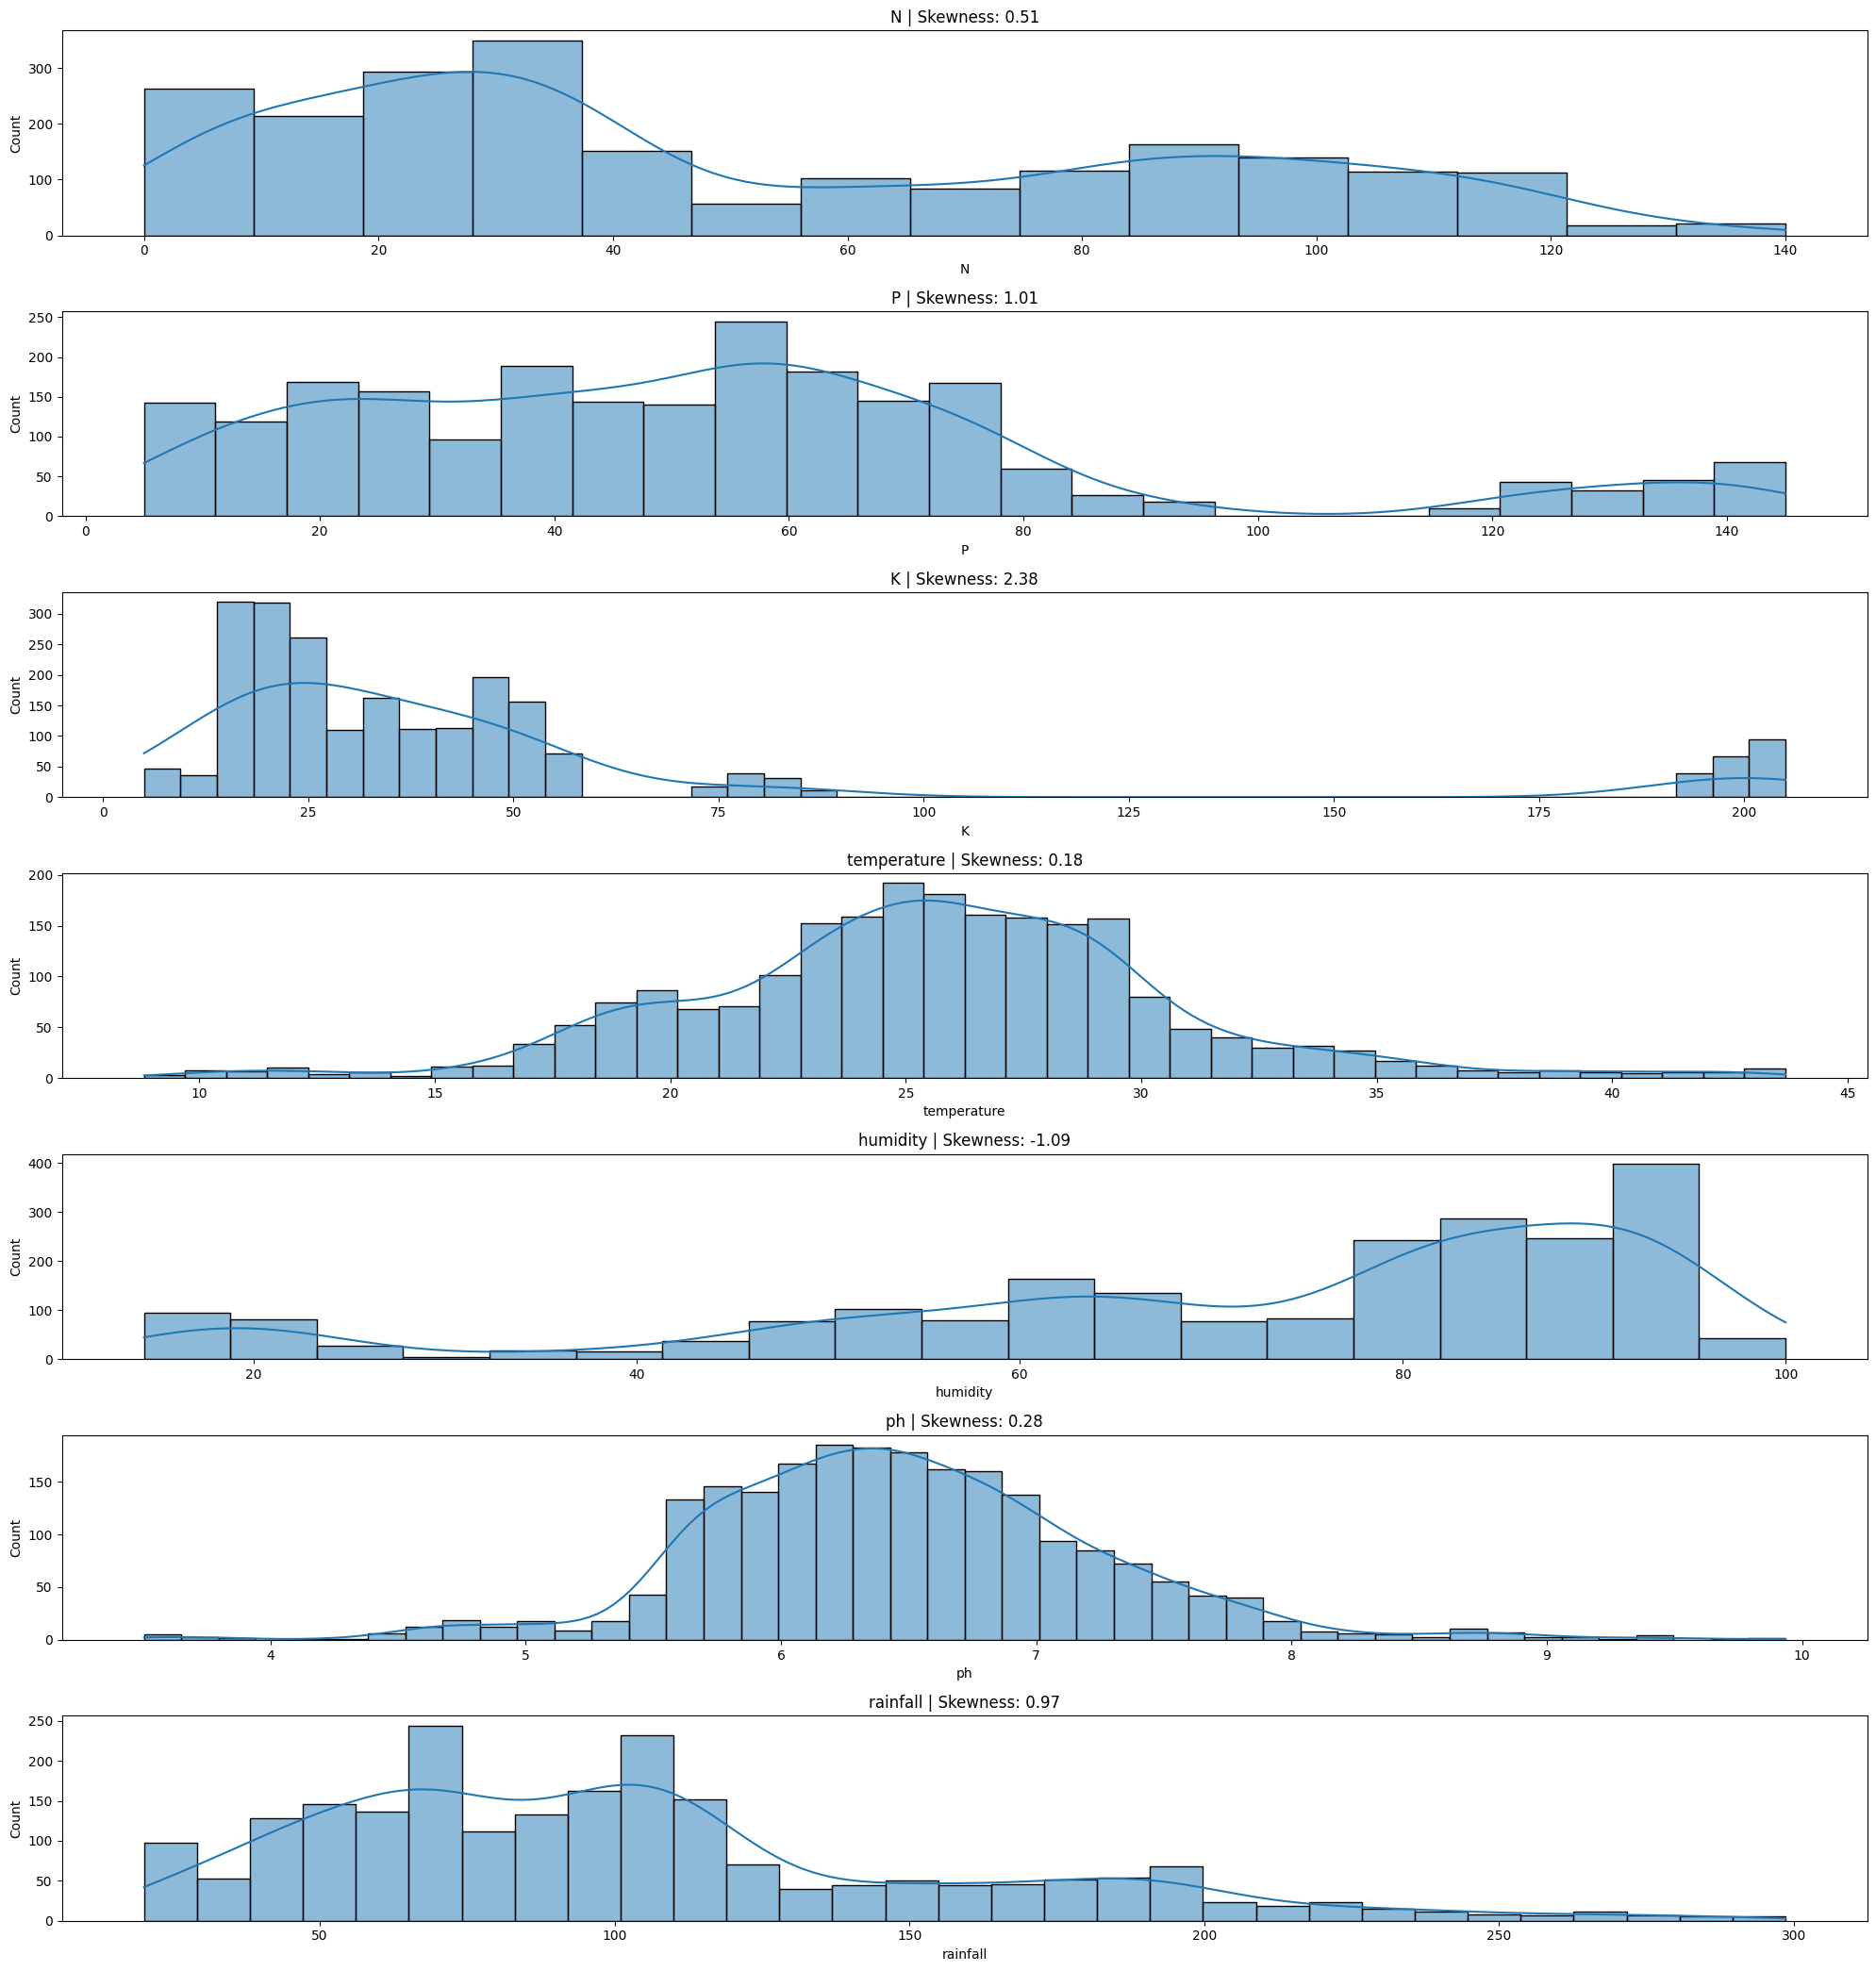

In [8]:
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(20, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, idx)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")
    sns.histplot(df[feature].dropna(), kde=True)
    



plt.tight_layout()
plt.show()

In [9]:
le = LabelEncoder()

df['label_num'] = le.fit_transform(df['label'])
df.to_csv("crop_recommendation_with_label_num.csv", index=False)


label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Mapowanie etykiet:", label_mapping)


Mapowanie etykiet: {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}


                    N         P         K  temperature  humidity        ph  \
N            1.000000 -0.231460 -0.140512     0.026504  0.190688  0.096683   
P           -0.231460  1.000000  0.736232    -0.127541 -0.118734 -0.138019   
K           -0.140512  0.736232  1.000000    -0.160387  0.190859 -0.169503   
temperature  0.026504 -0.127541 -0.160387     1.000000  0.205320 -0.017795   
humidity     0.190688 -0.118734  0.190859     0.205320  1.000000 -0.008483   
ph           0.096683 -0.138019 -0.169503    -0.017795 -0.008483  1.000000   
rainfall     0.059020 -0.063839 -0.053461    -0.030084  0.094423 -0.109069   
label_num   -0.031130 -0.491006 -0.346417     0.113606  0.193911 -0.012253   

             rainfall  label_num  
N            0.059020  -0.031130  
P           -0.063839  -0.491006  
K           -0.053461  -0.346417  
temperature -0.030084   0.113606  
humidity     0.094423   0.193911  
ph          -0.109069  -0.012253  
rainfall     1.000000   0.045611  
label_num    0.04

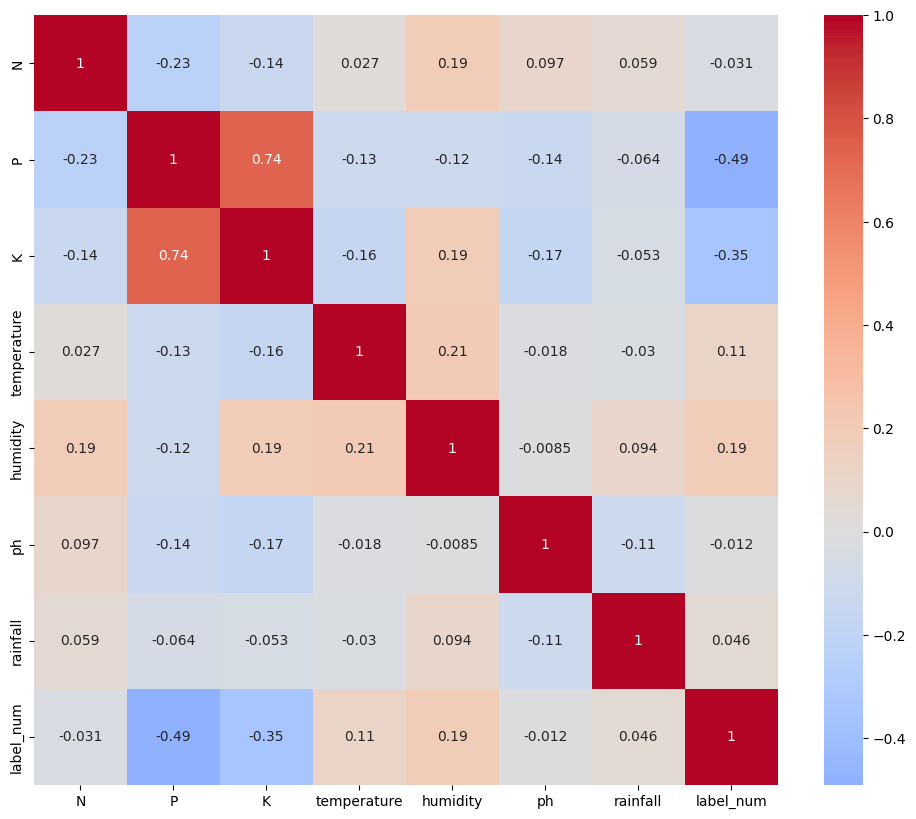

In [10]:
df_liczbowe = df.select_dtypes(include=['float64', 'int64'])
korelacja = df_liczbowe.corr()
print(korelacja)
plt.figure(figsize=(12, 10)) 
sns.heatmap(korelacja, annot=True, cmap='coolwarm', center=0)
plt.show()

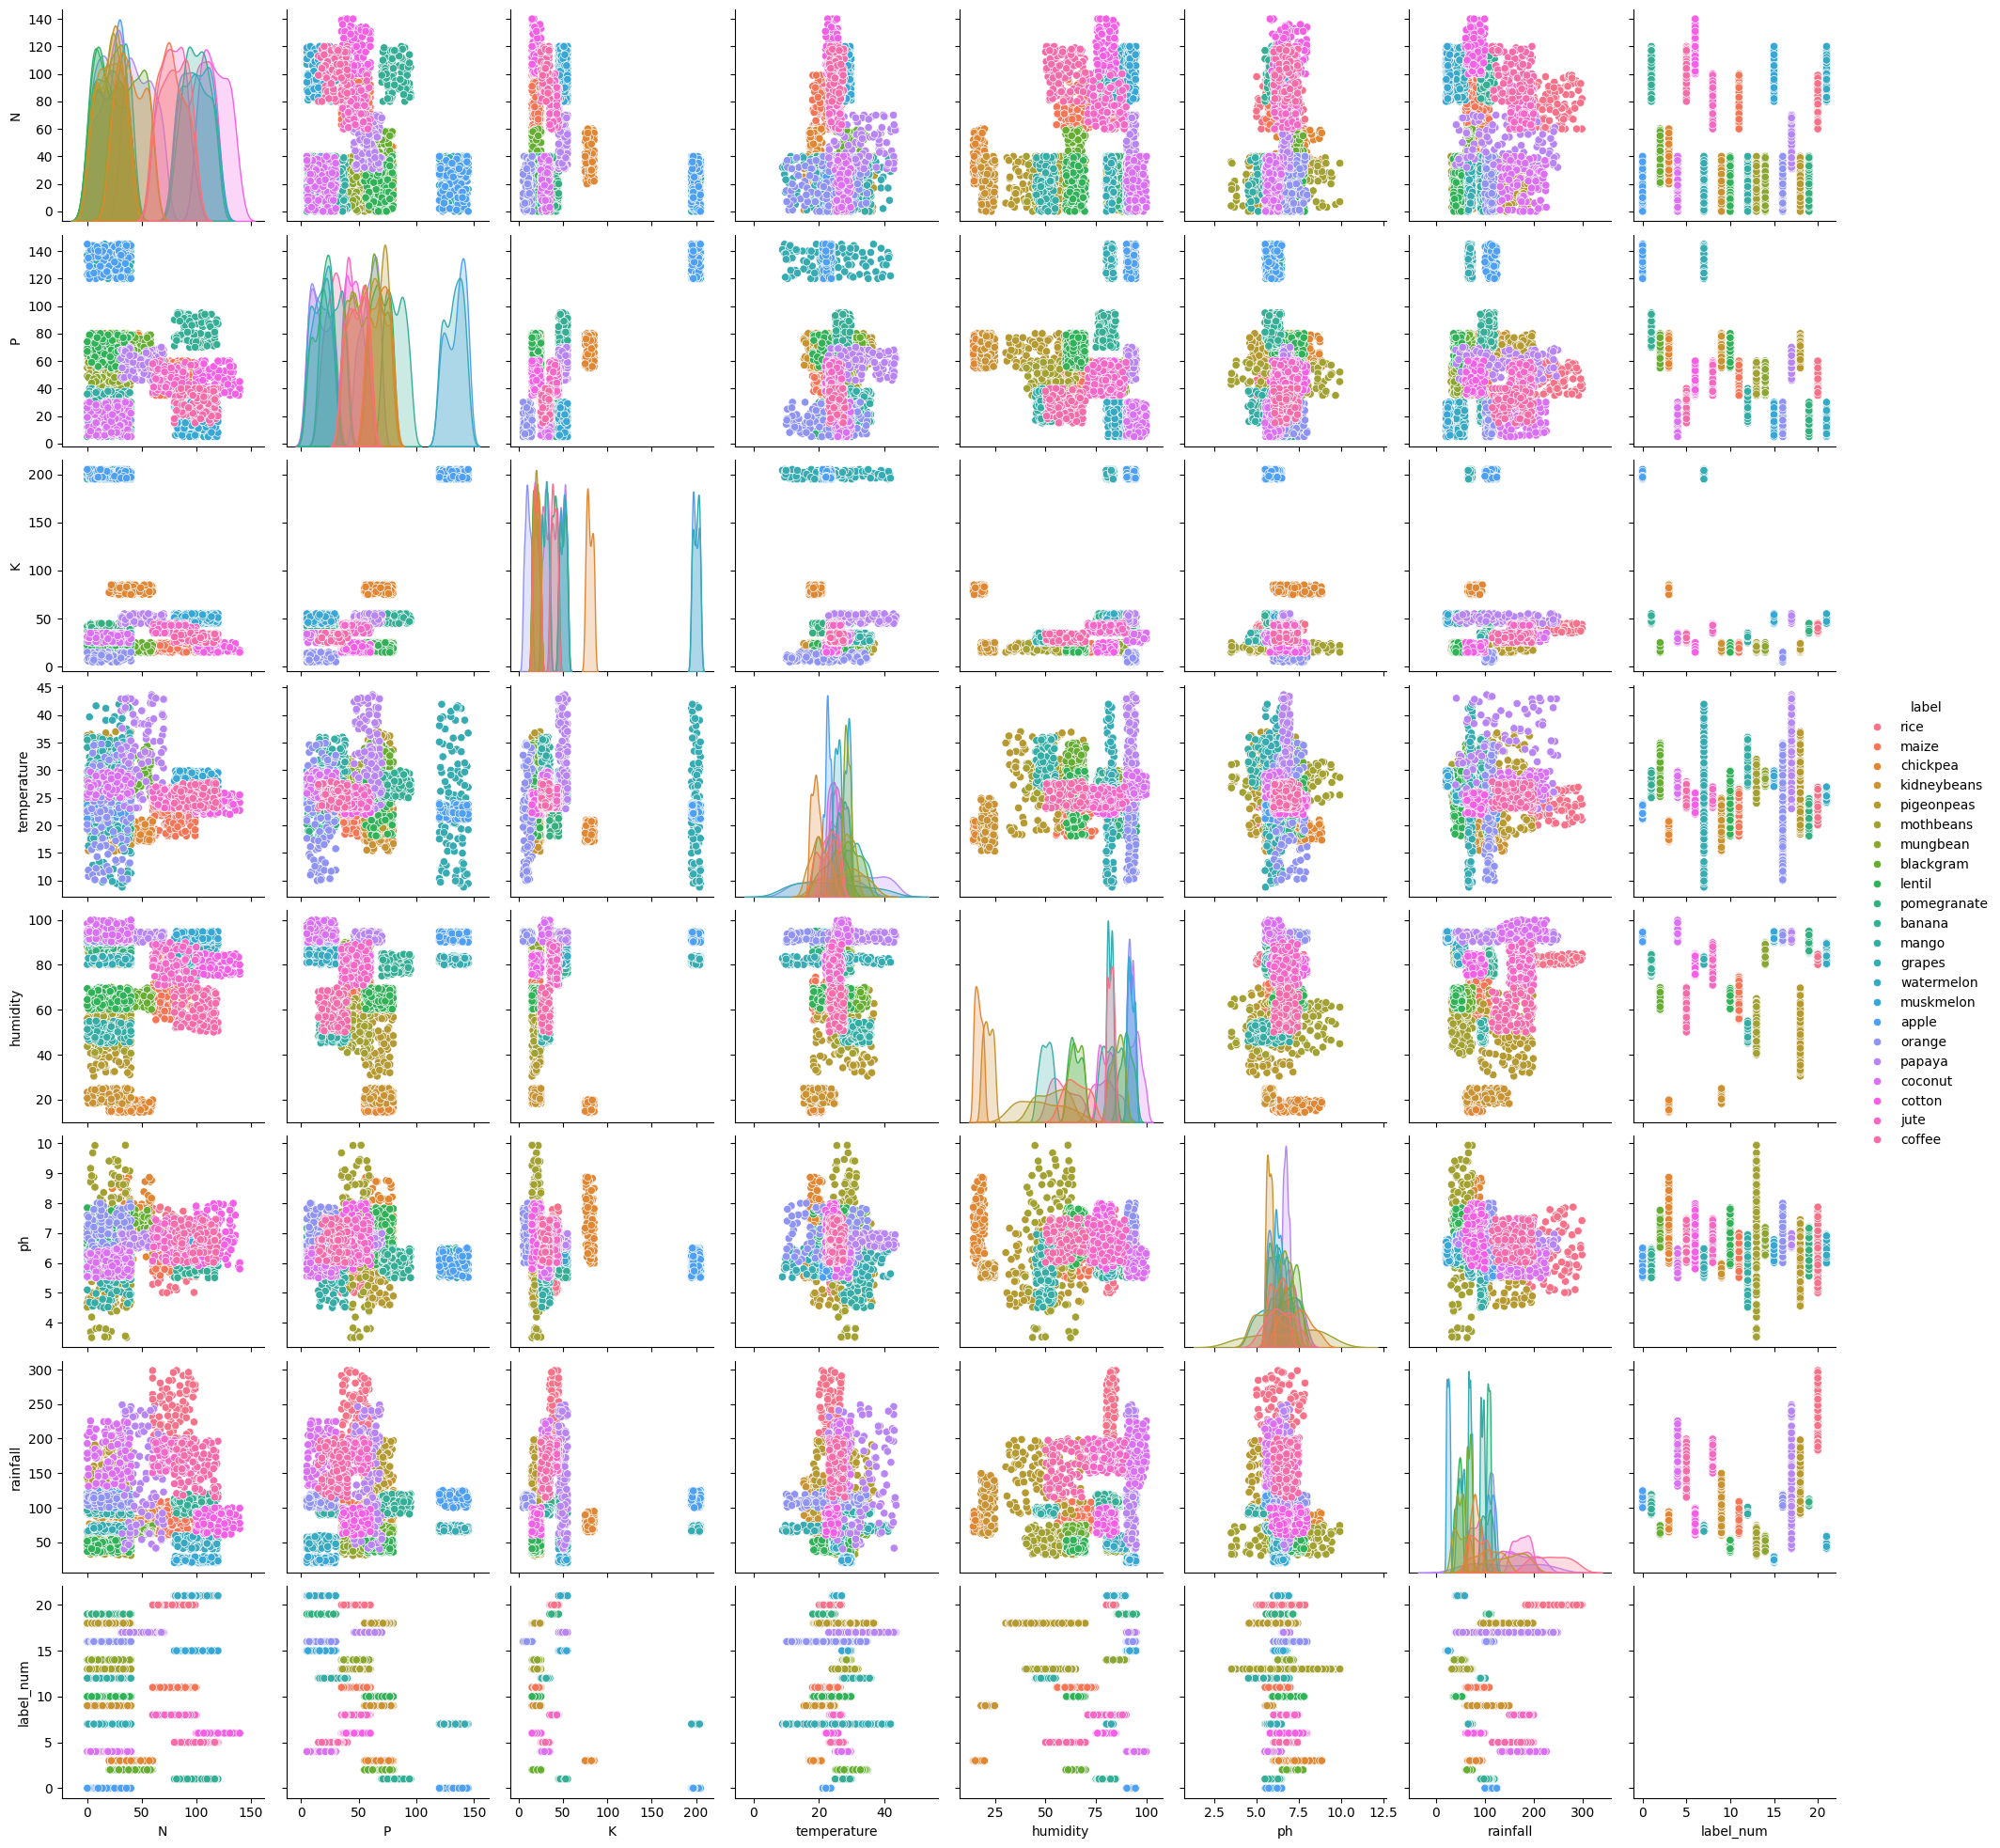

In [11]:
sns.pairplot(df,hue = 'label')